In [1]:
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
# récupération des chemins des images dans les différents dossier
train_image_dir = "./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train"

image_paths_train = []

for i in os.listdir(train_image_dir):
    folder_path = os.path.join(train_image_dir, i)
    if i != '.DS_Store':
        for j in os.listdir(folder_path):
            file_path = os.path.join(folder_path, j)
            image_paths_train.append(file_path)

In [3]:
train_label_dir = "./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train"

label_paths_train = []

for i in os.listdir(train_label_dir):
    folder_path = os.path.join(train_label_dir, i)
    if i != '.DS_Store':
        for j in os.listdir(folder_path):
            file_path = os.path.join(folder_path, j)
            label_paths_train.append(file_path)

In [4]:
val_image_dir = "./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val"

image_paths_validation = []

for i in os.listdir(val_image_dir):
    folder_path = os.path.join(val_image_dir, i)
    if i != '.DS_Store':
        for j in os.listdir(folder_path):
            file_path = os.path.join(folder_path, j)
            image_paths_validation.append(file_path)

In [5]:
val_label_dir = "./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val"

label_paths_validation = []

for i in os.listdir(val_label_dir):
    folder_path = os.path.join(val_label_dir, i)
    if i != '.DS_Store':
        for j in os.listdir(folder_path):
            file_path = os.path.join(folder_path, j)
            label_paths_validation.append(file_path)

In [6]:
# le dossier label contient 4 fichier pour chaque image
print(len(image_paths_train))
print(int((len(label_paths_train))/4))
print(len(image_paths_validation))
print(int((len(label_paths_validation))/4))

2975
2975
500
500


In [7]:
# train
df_image_paths_train = pd.DataFrame({"Index": "", "Image_Path": image_paths_train})
df_label_paths_train = pd.DataFrame({"Index": "", "Target_Path": label_paths_train})

# validation
df_image_paths_validation = pd.DataFrame({"Index": "", "Image_Path": image_paths_validation})
df_label_paths_validation = pd.DataFrame({"Index": "", "Target_Path": label_paths_validation})

In [8]:
# suppression des fichier inutile des labels image
filter_instanceIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('instanceIds')]
filter_polygons = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('polygons')]
filter_labelIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('labelIds')]

df_label_paths_train = df_label_paths_train.drop(filter_instanceIds.index)
df_label_paths_train = df_label_paths_train.drop(filter_polygons.index)
df_label_paths_train = df_label_paths_train.drop(filter_labelIds.index)

filter_instanceIds = df_label_paths_validation[df_label_paths_validation['Target_Path'].str.contains('instanceIds')]
filter_polygons = df_label_paths_validation[df_label_paths_validation['Target_Path'].str.contains('polygons')]
filter_labelIds = df_label_paths_validation[df_label_paths_validation['Target_Path'].str.contains('labelIds')]

df_label_paths_validation = df_label_paths_validation.drop(filter_instanceIds.index)
df_label_paths_validation = df_label_paths_validation.drop(filter_polygons.index)
df_label_paths_validation = df_label_paths_validation.drop(filter_labelIds.index)

In [9]:
print(len(df_image_paths_train))# X
print(len(df_label_paths_train))# y

print(len(df_image_paths_validation))# X
print(len(df_label_paths_validation))# y

2975
2975
500
500


In [10]:
# création d'un index à partir du nom du fichier simplifié
index_tab = []
for el in df_image_paths_train['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_leftImg8bit", "")
    index_tab.append(file_name)
df_image_paths_train['Index'] = index_tab

In [11]:
index_tab = []
for el in df_label_paths_train['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_gtFine_color", "")
    index_tab.append(file_name)
df_label_paths_train['Index'] = index_tab

In [12]:
index_tab = []
for el in df_image_paths_validation['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_leftImg8bit", "")
    index_tab.append(file_name)
df_image_paths_validation['Index'] = index_tab

In [13]:
index_tab = []
for el in df_label_paths_validation['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_gtFine_color", "")
    index_tab.append(file_name)
df_label_paths_validation['Index'] = index_tab

In [14]:
df_train = pd.merge(df_image_paths_train, df_label_paths_train, on='Index', how='left')
df_val = pd.merge(df_image_paths_validation, df_label_paths_validation, on='Index', how='left')

In [15]:
df_train

,Index,Image_Path,Target_Path
0,zurich_000069_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/zurich/zurich_000069_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/zurich/zurich_000069_000019_gtFine_color.png
1,zurich_000063_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/zurich/zurich_000063_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/zurich/zurich_000063_000019_gtFine_color.png
2,zurich_000110_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/zurich/zurich_000110_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/zurich/zurich_000110_000019_gtFine_color.png
3,zurich_000016_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/zurich/zurich_000016_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/zurich/zurich_000016_000019_gtFine_color.png
4,zurich_000027_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/zurich/zurich_000027_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/zurich/zurich_000027_000019_gtFine_color.png
...,...,...,...
2970,bremen_000093_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/bremen/bremen_000093_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/bremen/bremen_000093_000019_gtFine_color.png
2971,bremen_000275_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/bremen/bremen_000275_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/bremen/bremen_000275_000019_gtFine_color.png
2972,bremen_000306_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/bremen/bremen_000306_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/bremen/bremen_000306_000019_gtFine_color.png
2973,bremen_000058_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/bremen/bremen_000058_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/bremen/bremen_000058_000019_gtFine_color.png


In [16]:
df_val

,Index,Image_Path,Target_Path
0,munster_000025_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000025_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/munster/munster_000025_000019_gtFine_color.png
1,munster_000156_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000156_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/munster/munster_000156_000019_gtFine_color.png
2,munster_000050_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000050_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/munster/munster_000050_000019_gtFine_color.png
3,munster_000123_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000123_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/munster/munster_000123_000019_gtFine_color.png
4,munster_000091_000019,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000091_000019_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/munster/munster_000091_000019_gtFine_color.png
...,...,...,...
495,frankfurt_000001_037705,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_037705_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_037705_gtFine_color.png
496,frankfurt_000000_014480,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000000_014480_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000000_014480_gtFine_color.png
497,frankfurt_000001_051807,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_051807_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_051807_gtFine_color.png
498,frankfurt_000001_066574,./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_000001_066574_leftImg8bit.png,./Data/files/Cityscapes_gtFine_trainvaltest/gtFine/val/frankfurt/frankfurt_000001_066574_gtFine_color.png


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
from tensorflow.keras.layers import Reshape
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-21 12:07:30.017810: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
X_train = df_train['Image_Path']
y_train = df_train['Target_Path']

X_test = df_val['Image_Path']
y_test = df_val['Target_Path']

In [19]:
# Définir une fonction pour prétraiter les images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Charger l'image en taille 224x224 (taille attendue par VGG16)
    img_array = img_to_array(img)  # Convertir l'image en tableau numpy
    return img_array

# Prétraiter les images d'entraînement
X_train_processed = np.array([preprocess_image(img_path) for img_path in X_train])

# Prétraiter les images de test
X_test_processed = np.array([preprocess_image(img_path) for img_path in X_test])

In [20]:
def preprocess_label(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Charger l'image en taille 224x224 (taille attendue par VGG16)
    img_array = img_to_array(img)  # Convertir l'image en tableau numpy
    return img_array

# Prétraiter les images d'entraînement
y_train_processed = np.array([preprocess_label(img_path) for img_path in y_train])

# Prétraiter les images de test
y_test_processed = np.array([preprocess_label(img_path) for img_path in y_test])

In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Verrouillez les poids du modèle de base
base_model.trainable = False

In [22]:
# Obtenez la sortie de la dernière couche de base_model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(224 * 224 * 3, activation='sigmoid')(x)  # Modifiez la taille pour correspondre à la forme des étiquettes
output = Reshape((224, 224, 3))(output)  # Modifiez la forme pour correspondre à la forme des étiquettes

# Créer le modèle final
model = Model(inputs=base_model.input, outputs=output)

In [23]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [24]:
# Créer des instances de ImageDataGenerator pour l'augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Redimensionnement des valeurs de pixel
    rotation_range=20,  # Rotation aléatoire des images
    width_shift_range=0.2,  # Déplacement horizontal aléatoire
    height_shift_range=0.2,  # Déplacement vertical aléatoire
    shear_range=0.2,  # Inclinaison aléatoire
    zoom_range=0.2,  # Zoom aléatoire
    horizontal_flip=True,  # Retournement horizontal aléatoire
    fill_mode='nearest')  # Mode de remplissage des pixels lors de transformations

test_datagen = ImageDataGenerator(rescale=1./255)  # Ne pas augmenter les données de test, juste redimensionner

# Définir le générateur de données pour les données d'entraînement et de validation
train_generator = train_datagen.flow(X_train_processed, y_train_processed, batch_size=32)
validation_generator = test_datagen.flow(X_test_processed, y_test_processed, batch_size=32)

In [25]:
model.fit(train_generator, epochs=3, validation_data=validation_generator)

Epoch 1/3


/Applications/anaconda3/envs/VisionTransport/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


93/93 ━━━━━━━━━━━━━━━━━━━━ 778s 8s/step - accuracy: 0.3887 - loss: 287.1984 - val_accuracy: 0.4246 - val_loss: 278.3320
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 844s 9s/step - accuracy: 0.4120 - loss: 285.6299 - val_accuracy: 0.4297 - val_loss: 277.9292
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 779s 8s/step - accuracy: 0.4292 - loss: 284.8810 - val_accuracy: 0.5000 - val_loss: 277.4851


In [26]:
from tensorflow.keras.models import save_model

save_model(model, './models/model_01.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


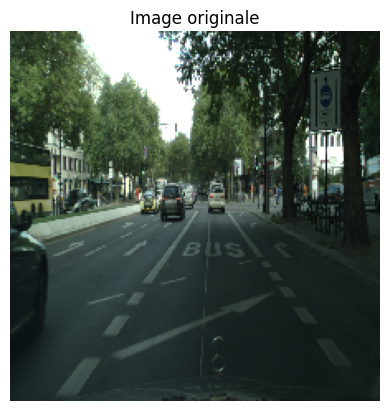

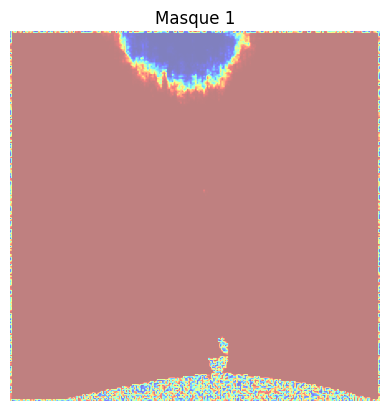

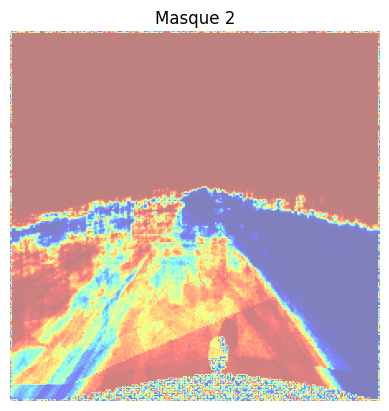

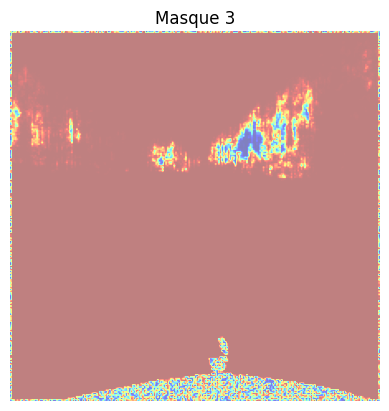

In [30]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Charger l'image de test que vous souhaitez segmenter
new_image = image.load_img(
    "./Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/test/berlin/berlin_000000_000019_leftImg8bit.png",
    target_size=(224, 224))

# Convertir l'image en tableau numpy
new_image_array = image.img_to_array(new_image)

# Ajouter une dimension supplémentaire pour le batch
new_image_batch = np.expand_dims(new_image_array, axis=0)

# Faire une prédiction sur l'image avec votre modèle
prediction = model.predict(new_image_batch)

# Afficher les résultats de la prédiction
plt.imshow(new_image)
plt.title('Image originale')
plt.axis('off')
plt.show()

# Afficher chaque masque de segmentation prédit
for i in range(prediction.shape[-1]):
    plt.imshow(prediction[0, :, :, i], cmap='jet', alpha=0.5)  # Utilisez un colormap approprié pour afficher les masques de différentes couleurs
    plt.title(f'Masque {i+1}')
    plt.axis('off')
    plt.show()